In [2]:
import sys  ; sys.path.append("../../codes/")
from modules_v0 import mod_rad_cl_correction as mrcl
import healpy as h
from scipy.interpolate import interp1d
import scipy.integrate as intg


%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [3]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans',
          'image.cmap':'jet'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
b="#1f77b4"
o="#ff7f0e"
g="#2ca02c"
r="#d62728"
pr="#9467bd"
br="#8c564b"
p="#e377c2"
gr="#7f7f7f"
y="#bcbd22"
c="#17becf"

In [5]:
nside=512 ; pixsize=sqrt(4.*pi/h.nside2npix(nside)) 
y1=mrcl.mod_rad_ker(3*nside,f=14)

<IPython.core.display.Javascript object>


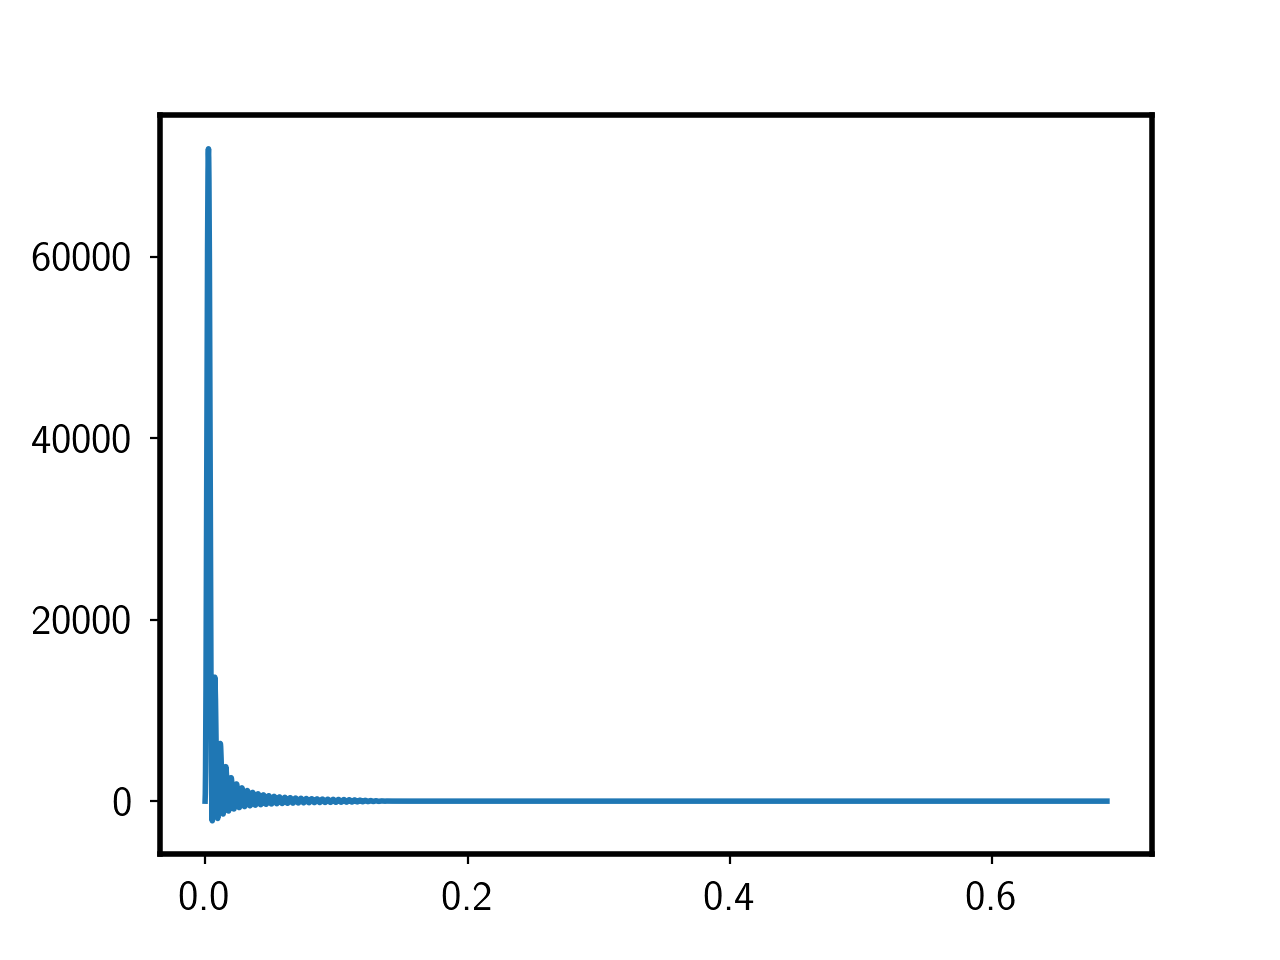

In [42]:
apow=mrcl.fn_step_apo(y1.theta,y1.beta0,frac_apow=0.3)
figure()
plot(y1.theta,gbeta)
gbeta=apow*y1.fbeta

In [43]:
shift=0.*pixsize ; width=2.*pixsize ; slope=1. 
(mrcl.get_mod_gbeta_root(shift*180./pi,width*180./pi,slope)+5*width)*180./pi
print pixsize*180./pi

0.114516213727


In [44]:
shift=0.*pixsize ; width=2.*pixsize ; slope=1. ; 
gbetap=mrcl.mod_gbeta(y1.theta,shift=shift*180./pi ,width=width*180./pi ,slope=slope, expslope=1.5)
fn=interp1d(y1.theta,gbetap*gbetap,kind="cubic")
norm=intg.quad(fn,0,mrcl.get_mod_gbeta_root(shift*180./pi ,width*180./pi ,slope)+5*width)[0] ; print norm
gbetap=gbetap/norm

3.01103957601e-08


In [45]:
glp=y1.get_gl_from_gbeta(gbetap,35*pixsize,3*nside,rtol=1e-7,atol=1e-8)
gl3=y1.get_gl_from_gbeta(gbeta,3*mrcl.return_beta0(3*nside),3*nside,rtol=1e-7,atol=1e-8)
gaussblw=h.gauss_beam(fwhm=(15./60.)*np.pi/180.,lmax=3*nside)
gaussbln=h.gauss_beam(fwhm=(5./60.)*np.pi/180.,lmax=3*nside)

In [46]:
gaussblw=h.gauss_beam(fwhm=(15./60.)*np.pi/180.,lmax=3*nside)
gaussbln=h.gauss_beam(fwhm=(12./60.)*np.pi/180.,lmax=3*nside)

<IPython.core.display.Javascript object>


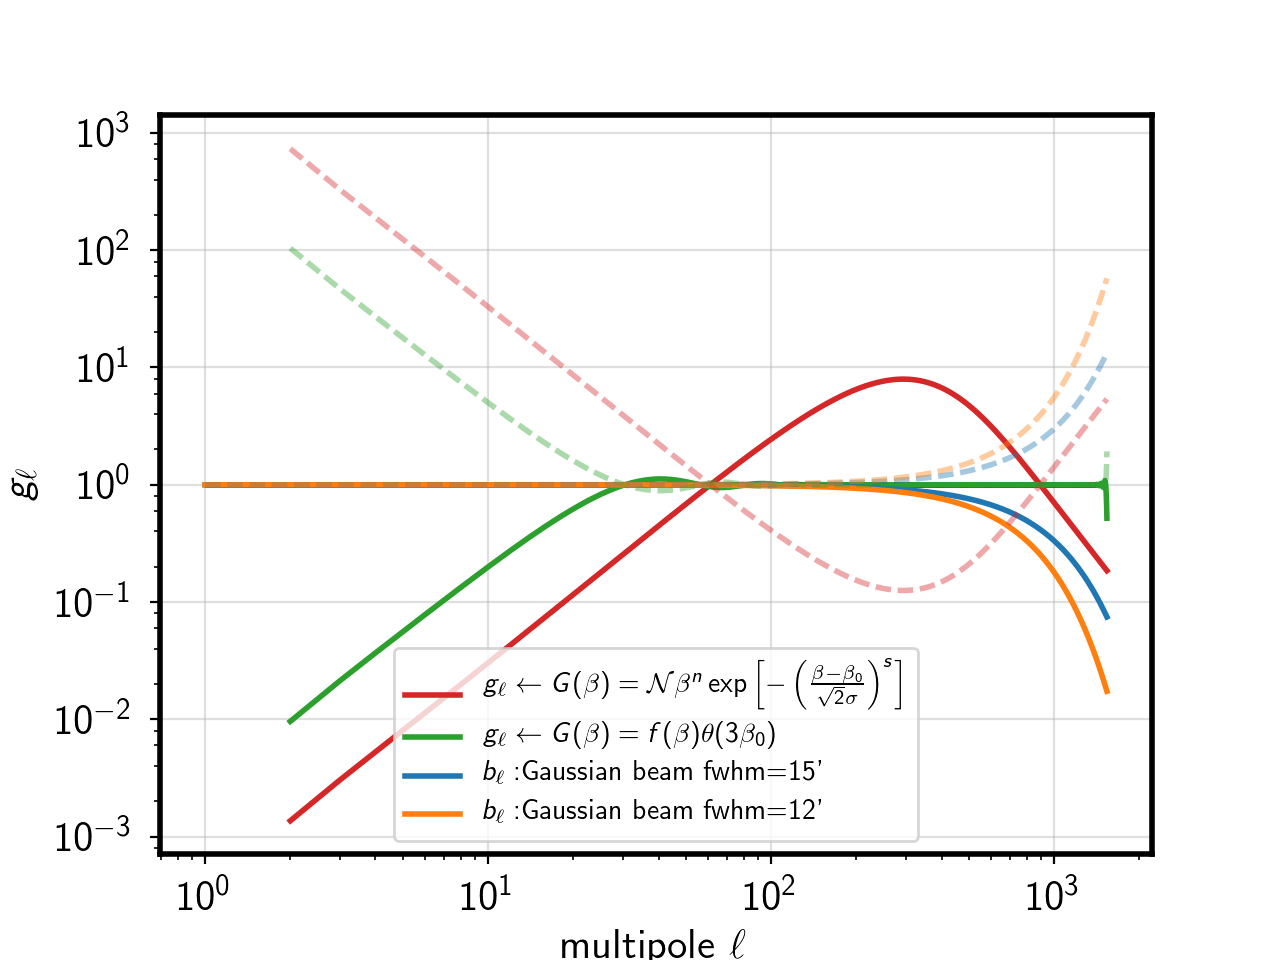

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide


In [47]:
figure()
ell=arange(3*nside+1)
plot(ell,glp,"-",c=r,lw=2,label=r"$g_{\ell} \leftarrow G(\beta)= \mathcal{N} \beta^n \exp{\left[ -\left({\frac{\beta-\beta_0}{\sqrt{2} \sigma}}\right)^s \right] }$")
plot(ell,gl3,"-",c=g,lw=2,label=r"$g_{\ell} \leftarrow G(\beta) = f(\beta)\theta(3\beta_0)$")
plot(ell,gaussbln,"-",c=b,lw=2,label=r"$b_{\ell}:$" + "Gaussian beam fwhm=15' ")
plot(ell,gaussblw,"-",c=o,lw=2,label=r"$b_{\ell}:$" + "Gaussian beam fwhm=12' ")
plot(ell,(1./glp**1.),"--",c=r,lw=2,alpha=0.4)
plot(ell,(1./gl3**1.),"--",c=g,lw=2,alpha=0.4)
plot(ell,(1./gaussbln**1.),"--",c=b,lw=2,alpha=0.4)
plot(ell,(1./gaussblw**1.),"--",c=o,lw=2,alpha=0.4)
hlines(1,1,3*nside)
grid(alpha=0.4)
loglog()
xlabel("multipole $\ell$")
ylabel(r"$g_\ell$")
legend(loc=0,fontsize=10)
figname="../../figures/gl_for_different_gbeta_lmax" + str(3*nside) + ".pdf"
#savefig(figname,dpi=300,bbox_inches="tight")

In [48]:
recgbetap=y1.get_gbeta_from_gl(glp)
recgbeta=y1.get_gbeta_from_gl(gl3)
gbetablw=y1.get_gbeta_from_gl(gaussblw)
gbetabln=y1.get_gbeta_from_gl(gaussbln)

<IPython.core.display.Javascript object>


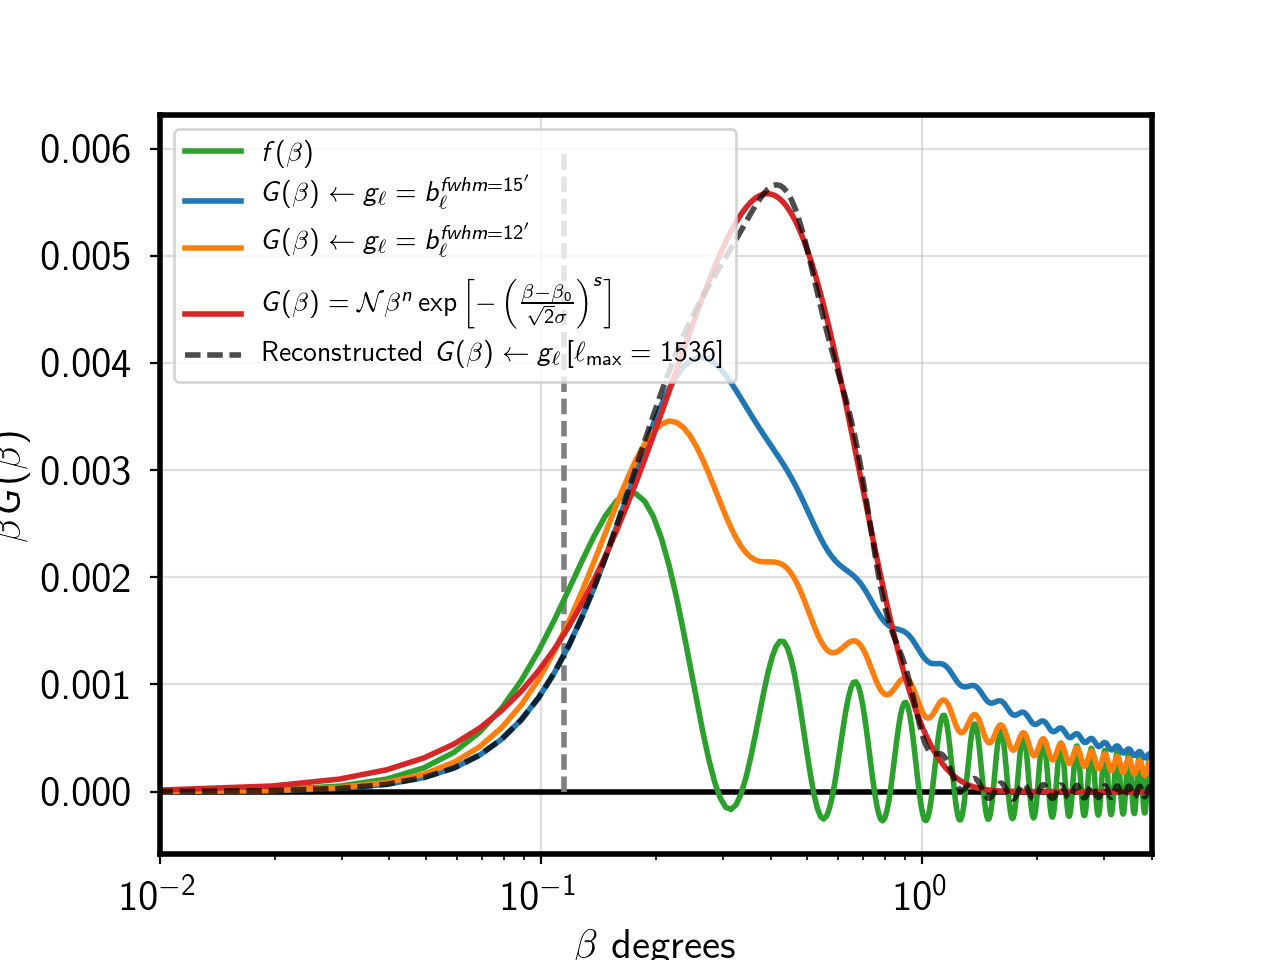

In [54]:
figure()
plot(y1.theta*180./pi,y1.theta*gbeta/max(gbeta),"-",c=g,lw=2,label=r"$f(\beta)$")
#plot(y1.theta*180./pi,y1.theta*recgbeta/max(gbeta),"--",c=br,lw=2,label=r"$f(\beta)$")
plot(y1.theta*180./pi,y1.theta*gbetablw/max(gbetablw),"-",c=b,lw=2,label=r"$G(\beta) \leftarrow g_{\ell}=b^{fwhm=15'}_{\ell}$")
plot(y1.theta*180./pi,y1.theta*gbetabln/max(gbetabln),"-",c=o,lw=2,label=r"$G(\beta) \leftarrow g_{\ell}=b^{fwhm=12'}_{\ell}$")
plot(y1.theta*180./pi,y1.theta*gbetap/max(gbetap),"-",c=r,lw=2,label=r"$G(\beta)= \mathcal{N} \beta^n \exp{\left[ -\left({\frac{\beta-\beta_0}{\sqrt{2} \sigma}}\right)^s \right] }$")
plot(y1.theta*180./pi,y1.theta*recgbetap/max(gbetap),"--",c="k",alpha=0.7,lw=2,label=r"Reconstructed $G(\beta) \leftarrow g_{\ell} \,[\ell_{\rm max} =" + str(3*nside) + "]$")

#semilogy()
semilogx()
grid(alpha=0.4)
xlim(1e-2,35*pixsize*180./pi)
#ylim(1e-4,2)
#hlines(1e-2,1e-1,35*pixsize*180./pi)
hlines(0,1e-4,35*pixsize*180./pi)
vlines(pixsize*180./pi,0,0.006,linestyle="dashed",alpha=1,color="gray")
xlabel(r"$\beta$ degrees")
ylabel(r"$\beta G(\beta)$")
legend(loc=0,fontsize=10)
figname="../../figures/Gbeta_for_different_gl_lmax" + str(3*nside) + ".pdf"
#savefig(figname,dpi=300,bbox_inches="tight")

In [57]:
#bl=y1.get_bl_from_beam(gbeta)
beam_glp=mrcl.get_beam_form_bl(y1.theta,glp)
beam_gl3=mrcl.get_beam_form_bl(y1.theta,gl3)
bldelta=mrcl.get_beam_form_bl(y1.theta,np.ones(glp.size))

In [58]:
glpinv=1./glp ; glpinv[:2]=0. ; print glpinv
beam_glpinv=mrcl.get_beam_form_bl(y1.theta,glpinv)

[   0.            0.          731.88868896 ...,    5.3719147     5.3828802
    5.39374228]


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [59]:
gbeamw=mrcl.get_beam_form_bl(y1.theta,gaussblw)
gbeamn=mrcl.get_beam_form_bl(y1.theta,gaussbln)
bldelta=mrcl.get_beam_form_bl(y1.theta,np.ones(glp.size))

<IPython.core.display.Javascript object>


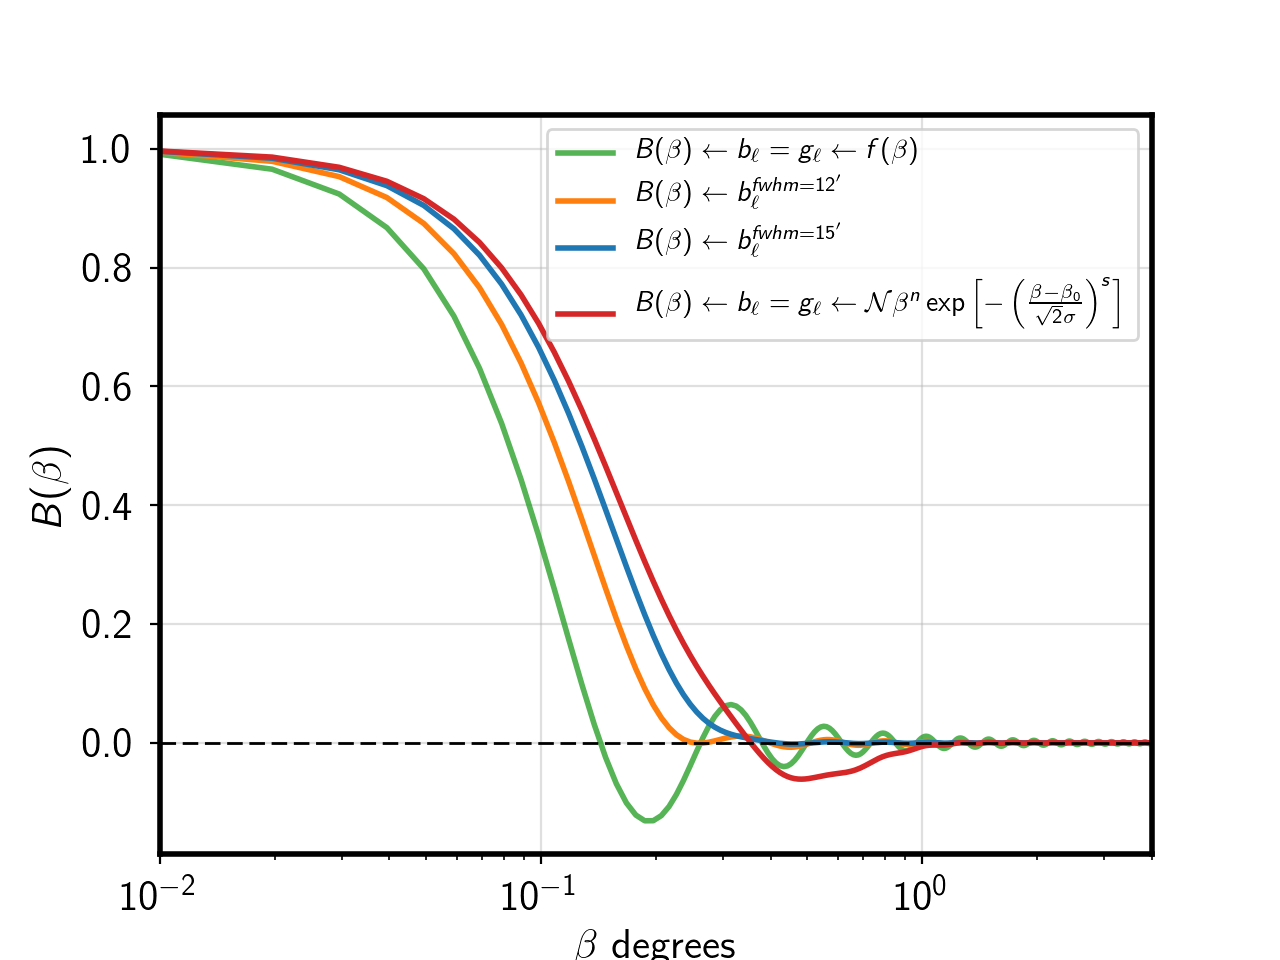

In [61]:
figure()
plot(y1.theta*180./pi,beam_gl3/max(beam_gl3),"-",c=g,lw=2,alpha=0.8,label=r"$B(\beta) \leftarrow b_{\ell} = g_{\ell} \leftarrow f(\beta)$")
plot(y1.theta*180./pi,gbeamn/max(gbeamn),"-",c=o,lw=2,label=r"$B(\beta) \leftarrow b^{fwhm=12'}_{\ell}$")
plot(y1.theta*180./pi,gbeamw/max(gbeamw),"-",c=b,lw=2,label=r"$B(\beta) \leftarrow b^{fwhm=15'}_{\ell}$")
plot(y1.theta*180./pi,beam_glp/max(beam_glp),"-",c=r,lw=2,label=r"$B(\beta) \leftarrow b_{\ell} = g_{\ell} \leftarrow \mathcal{N} \beta^n \exp{\left[ -\left({\frac{\beta-\beta_0}{\sqrt{2} \sigma}}\right)^s \right] } $")
#plot(y1.theta*180./pi,bldelta/max(bldelta),"k--",lw=2,label=r"$B(\beta) \leftarrow g_{\ell}$")
xlim(1e-2,35*pixsize*180./pi)
axhline(0,0,35*pixsize*180./pi,lw=1,color="k",linestyle="dashed")
legend(loc=0,fontsize=10)
grid(alpha=0.4)
semilogx()
ylabel(r"$B(\beta)$")
xlabel(r"$\beta$ degrees")
figname="../../figures/Bbeta_for_gl_lmax" + str(3*nside) + ".pdf"
#savefig(figname,dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


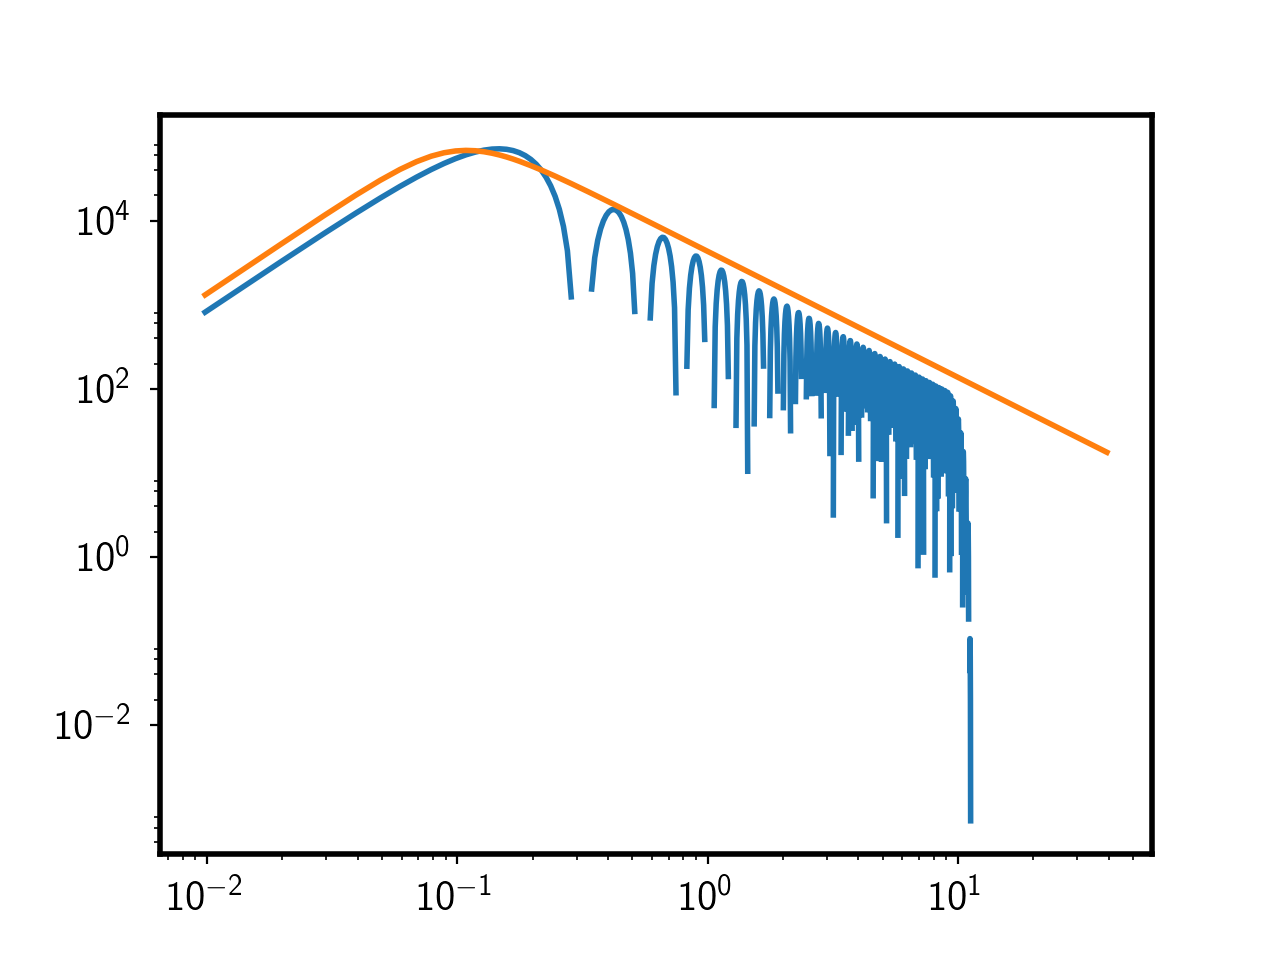

In [735]:
figure()
tempy=((3*512)**3.5)*10*(y1.theta)**2./(32.+(3*512*y1.theta)**3.5)
tempy1=y1.theta**2./(1.5e-5+(abs(45.*y1.theta-0.04)**4.55))
plot(y1.theta*180./pi,gbeta)
plot(y1.theta*180./pi,tempy)
#plot(y1.theta*180./pi,tempy1/max(tempy1))
#xlim(1e-1,3)
#ylim(1e-5,2)
loglog()
semilogx()
vlines(55*pixsize*180./pi,0,1)

In [638]:
clp=y1.get_gl_from_gbeta(tempy,55*pixsize,3*nside,rtol=1e-7,atol=1e-8)

<IPython.core.display.Javascript object>


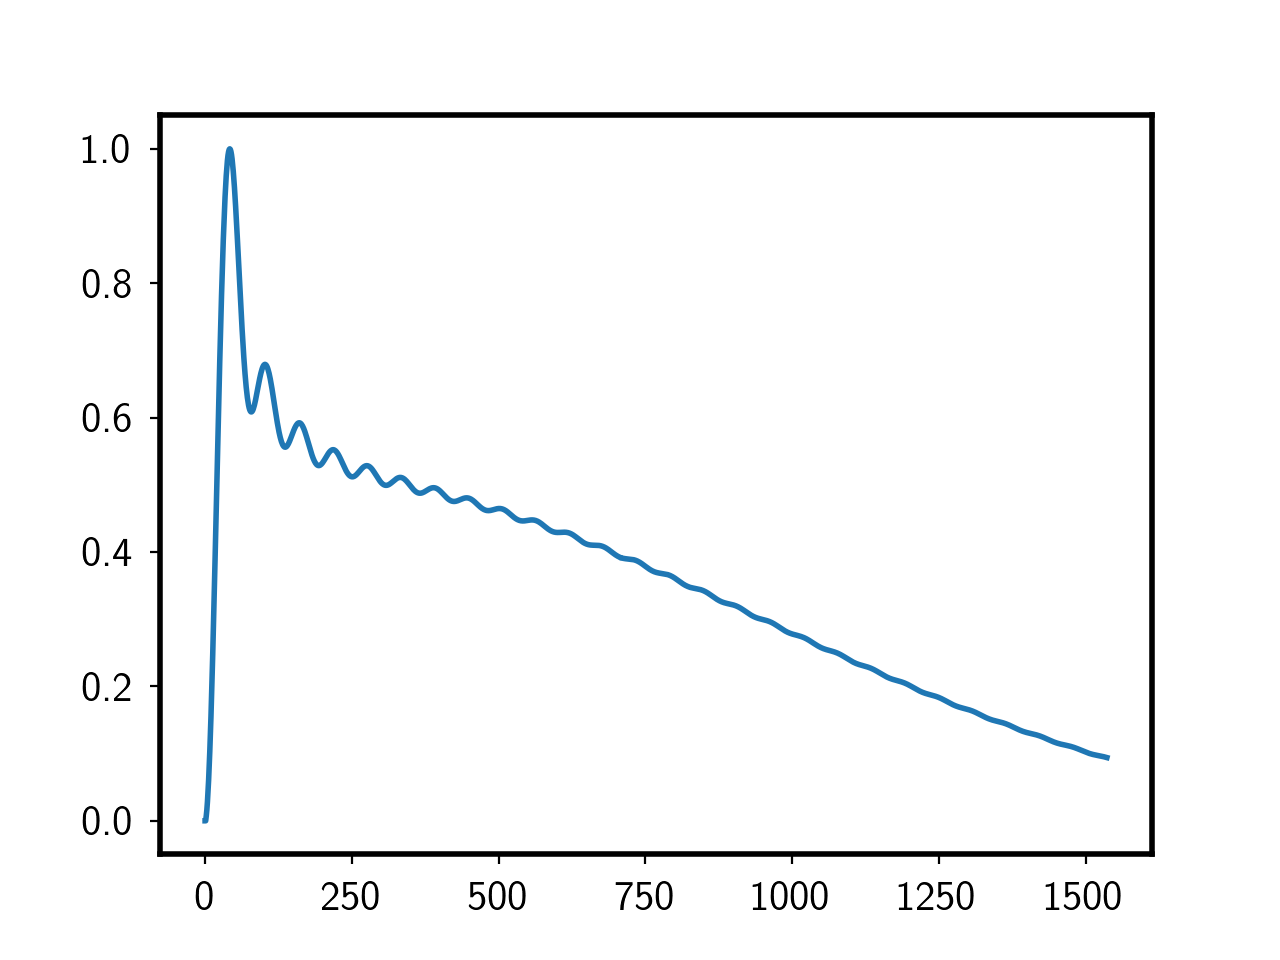

In [639]:
figure()
plot(ell,clp/max(clp))

In [640]:
ty=y1.get_gbeta_from_gl(clp)

<IPython.core.display.Javascript object>


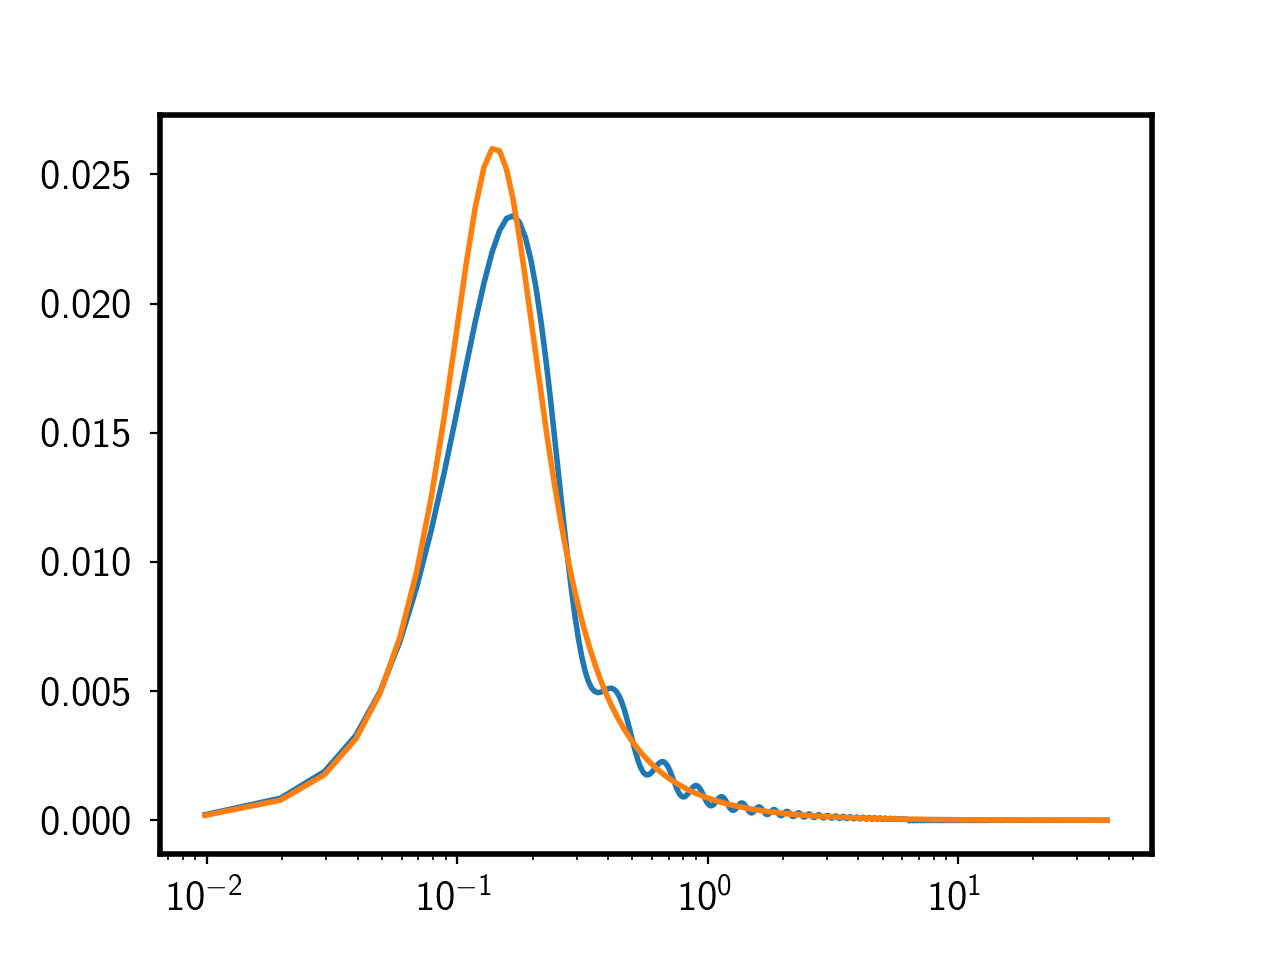

[]

In [641]:
figure()
plot(y1.theta*180./pi,ty)
plot(y1.theta*180./pi,tempy)
semilogx()

<IPython.core.display.Javascript object>


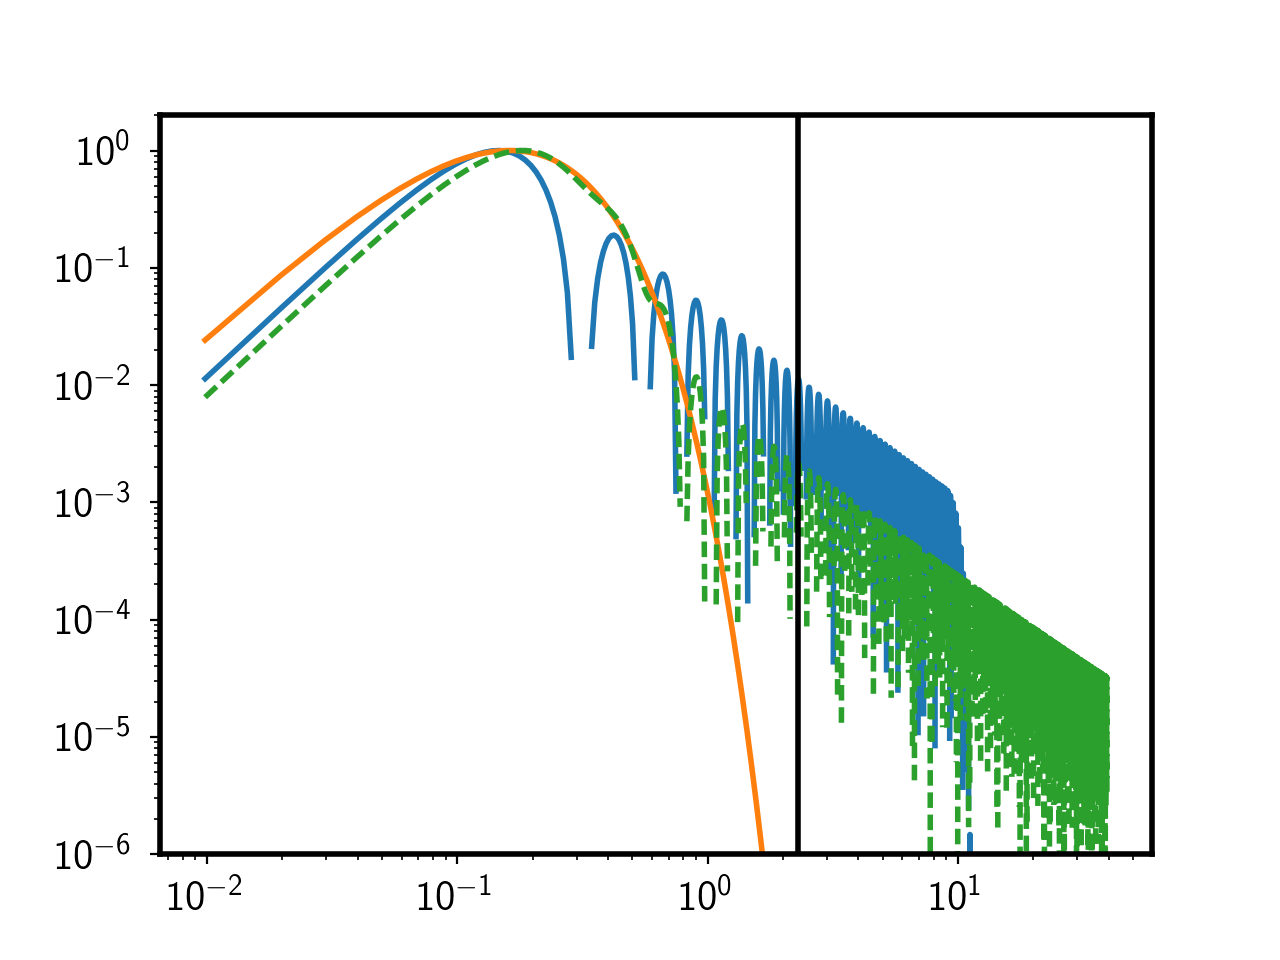

In [901]:
shift=30.*pixsize ; width=0.5*pixsize ; slope=2 ; 

figure()
plot(y1.theta*180./pi,gbeta/max(gbeta))
tbeta=mrcl.mod_gbeta(y1.theta,shift=shift*180./pi ,width=width*180./pi ,slope=slope, expslope=1)
plot(y1.theta*180./pi,tbeta/max(tbeta))
plot(y1.theta*180./pi,rtbeta/max(rtbeta),"--")
semilogx()
ylim(1e-6,2)
loglog()
axvline(20*pixsize*180./pi,color="k")

In [892]:
glt=y1.get_gl_from_gbeta(tbeta,35*pixsize,3*nside,rtol=1e-6,atol=1e-15)

In [894]:
rtbeta=y1.get_gbeta_from_gl(glt)

<IPython.core.display.Javascript object>


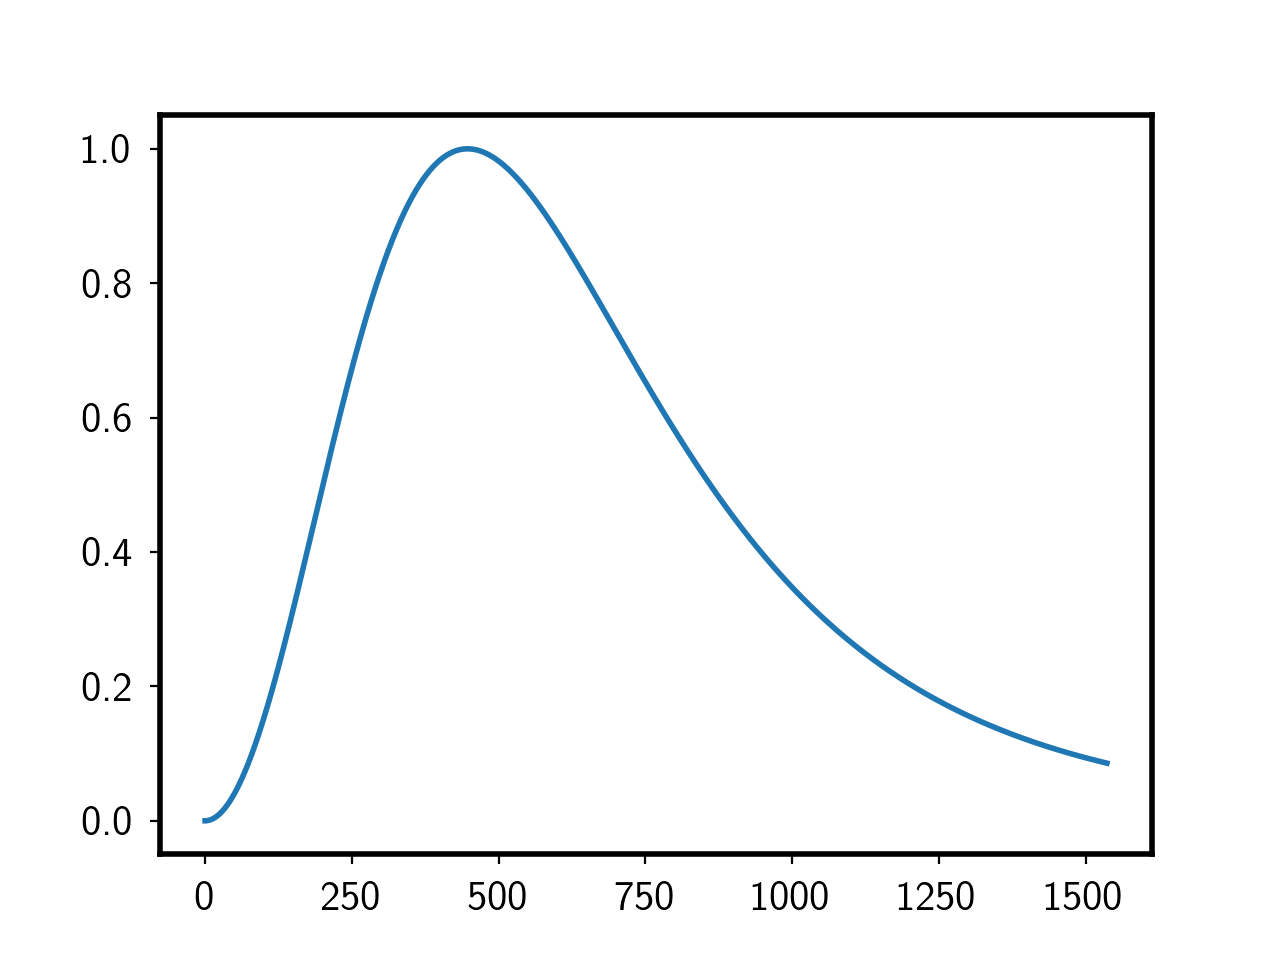

In [902]:
figure()
plot(ell,glt/max(glt))
#loglog()